## Les 2 - 2e orde differentiaalvergelijkingen

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## Opdracht 1 - vrije val

We laten een bal van 1 kg vallen van 50 m. Na hoeveel seconde raakt die de grond?
- Stel de differentiaalvergelijkingen op.
- Pas Forward Euler toe

$$\frac{dx}{dt} = v(t)$$
$$\frac{dv}{dt} = a(t) = -9.81$$

Waarbij:

- x(0) = 50
- v(0) = 0
- a(0) = a(t) = -9.81

De formules van Forward Euler, voor een gegeven stapgrootte $h$:
$$x(t+h) = x(t) + h \cdot v(t)$$
$$v(t+h) = v(t) - h \cdot 9.81$$ 

In [ ]:
h = 0.01 #stapgrootte
aantal_stappen = int(5/h) #we bekijken 5 seconden
a = -9.81 #m/s^2

t = np.zeros(aantal_stappen+1)
x = np.zeros(aantal_stappen+1)
v = np.zeros(aantal_stappen+1)

x[0] = 50
v[0] = 0
t[0] = 0

for step in range(aantal_stappen):
    t[step + 1] = t[step] + h
    x[step + 1] = x[step] + h * v[step]
    v[step + 1] = v[step] + h * a #dx/dt


In [ ]:
t[np.where(x>0)]

In [ ]:
plt.plot(t,x)
plt.xlabel('tijd in seconde')
plt.ylabel('afgelegde afstand in meters')

Hier een variant die stopt als de bal de grond raakt:

In [ ]:
h = 0.01 #stapgrootte
aantal_stappen = int(5/h) #we bekijken 5 seconden
a = -9.81

t = np.zeros(aantal_stappen+1)
x = np.zeros(aantal_stappen+1)
v = np.zeros(aantal_stappen+1)

x[0] = 50
v[0] = 0

step = 0
while x[step] > 0:
    t[step + 1] = t[step] + h
    x[step + 1] = x[step] + h* v[step]
    v[step + 1] = v[step] + h * a
    step +=1

plt.plot(t[:step],x[:step])

## Opdracht 2 - veerbeweging

Een veer is bevestigd aan de oorsprong (x = 0) en trekt een bal (met massa 2 kg) voortdurend terug. De differentiaalvergelijking hiervoor is: 

$$x''(t) = -\frac{k}{m}x(t)$$

Hierbij is m de massa van de bal (dus m = 2 in ons voorbeeld) en k een getal dat aangeeft hoe stijf de veer is. In ons voorbeeld neem k = 1.

Deze differentiaalvergelijking kun je vinden door Hooke's Law te combineren met de tweede wet van Newton. Hooke's Law zegt dat de kracht die een veer uitoefent op een voorwerp met mass $m$ gelijk is aan $F = -k\cdot x$ voor een constante $k$. De tweede wet van Newton is $F = m\cdot a$, waarbij $m$ de massa en $a$ de versnelling is. 
Deze combineren geeft: $-k\cdot x = m \cdot a$ en als je dit omschrijft krijg je $$a = -\frac{k}{m} \cdot x$$

- Schrijf deze tweede orde differentiaalvergelijking om naar 2 eerste orde differentiaalvergelijkingen.
- Pas vervolgens Forward Euler toe om de veerbeweging te visualiseren.

$$ \frac{dx}{dt} = v(t)$$
$$ \frac{dv}{dt} = -\frac{k}{m} x(t)$$

De Forward Euler formules voor een gegeven stapgroote $h$ is:
$$ x(t + h) = x(t) + h \cdot v(t) $$
$$ v(t + h) = v(t) - h \cdot \frac{k}{m} x(t)$$

In [ ]:
import numpy
import matplotlib.pyplot
k = 1 # veerconstante
m = 2 # massa van de bal
def forward_euler():
    h=0.1
    num_steps = 200
    t = numpy.zeros(num_steps+1)
    x = numpy.zeros(num_steps+1)
    v = numpy.zeros(num_steps+1)
    t[0] = 0
    x[0] = 1
    v[0] = 0
    
    for step in range(num_steps):
        t[step + 1] = t[step] + h
        x[step + 1] = x[step] + h * v[step]
        v[step + 1] = v[step] + h * - (k/m * x[step])
    return(t,x,v)
    
t,x,v = forward_euler()

def plot_me():
    axes_height = matplotlib.pyplot.subplot(211)
    matplotlib.pyplot.plot(t, x)
    axes_velocity = matplotlib.pyplot.subplot(212)
    matplotlib.pyplot.plot(t, v)
    axes_height.set_ylabel('Height in m')
    axes_velocity.set_ylabel('Velocity in m/s')
    axes_velocity.set_xlabel('Time in s')
    matplotlib.pyplot.show()

plot_me()


## Casus: Apollo 13

![](apollo.png)

### Stap 1: De maan

![](moon.png)

- De aarde bevindt zich in dit referentiekader op $(0, 0)$
- Voor de maan geldt (bij benadering):
 $$x(t) = 384 \cdot 10^6 \cdot \cos{\left(\frac{2 \pi t}{27}\right)}$$
 $$y(t) = 384 \cdot 10^6 \cdot \sin{\left(\frac{2 \pi t}{27}\right)}$$
- $t$ is de tijd in dagen, $x$ en $y$ zijn in meters.
- Is dit een differentiaalvergelijking? Waarom (niet)?
- Programmeer een simulatie om de positie van de maan te bepalen. Doe dit voor $27$ dagen, met $50$ stappen. Bereken een lijst of array van $x$ en $y$ posities en plot deze.

In [ ]:
moon_distance = 384e6 # m

num_steps = 50
x = np.zeros((num_steps,2))

for step in range(num_steps):
    x[step][0] = (moon_distance * np.cos(2 * np.pi * step / 27))
    x[step][1] = (moon_distance * np.sin(2 * np.pi * step / 27))

plt.axis('equal')
plt.plot(x[:,0], x[:,1])
axes = plt.gca()
axes.set_xlabel('Longitudinal position in m')
axes.set_ylabel('Lateral position in m')
plt.show()

### Stap 2: Apollo 13

- We programmeren de positie van Apollo 13 in een vaste baan om de aarde. Gebruik hiertoe de gegeven code als basis.
$$\frac{d^2\vec p}{dt^2} = -\frac{Gm}{r(t)^3} \cdot \vec p (t)$$
- $\vec p(t)$ is de positie, een 2D vector, ook wel $x(t)$ en $y(t)$ als componenten
- $m$ is de massa van de aarde
- $G$ is de gravitatieconstance $6.67\cdot 10^{-11} N \cdot m^2 / kg^2$
- $r(t) = \lVert \vec p \rVert = \sqrt{p_x(t)^2 + p_y(t)^2}$ is de afstand van de raket tot de aarde.

- $\vec v(t)$ is de snelheid, een 2D vector, die bestaat uit de twee afgeleiden
$$\vec v = \begin{bmatrix}
\frac{dx}{dt} \\
\frac{dy}{dt}
\end{bmatrix}$$

- $\vec a(t)$ is de versnelling, een 2D vector, die bestaat uit de twee tweede afgeleiden. Deze houden we niet bij, maar wordt berekend aan de hand van de positie. 

$$\vec a = \begin{bmatrix}
\frac{d^2 x}{dt^2} \\
\frac{d^2 y}{dt^2}
\end{bmatrix} = \begin{bmatrix}
\frac{dv_x}{dt} \\
\frac{dv_y}{dt}
\end{bmatrix} = - \frac{Gm}{r(t)^3} \cdot \begin{bmatrix}
x(t) \\
y(t)
\end{bmatrix}$$

### Euler
$$x(t + h) = x(t) + h \cdot v_x(t)$$
$$v_x(t+h) = v_x(t) - h \cdot \frac{Gm}{r(t)^3} \cdot x(t)$$
$$y(t + h) = y(t) + h \cdot v_y(t)$$
$$v_y(t+h) = v_y(t) - h \cdot \frac{Gm}{r(t)^3} \cdot y(t)$$

- De differentiaalvergelijking in dit voorbeeld werkt op een 2D vectoren. Wij splitsen deze op in een $x$ en $y$ component die we apart behandelen. Om de twee componenten op te slaan kun je een Numpy array gebruiken met 2 kolommen (en een rij per tijdspunt). Same voor $v$.

- Voor het berekenen van $r$ zijn wel beide componenten nodig. We kunnen de laatst-berekende rij steeds als vector meegegven.

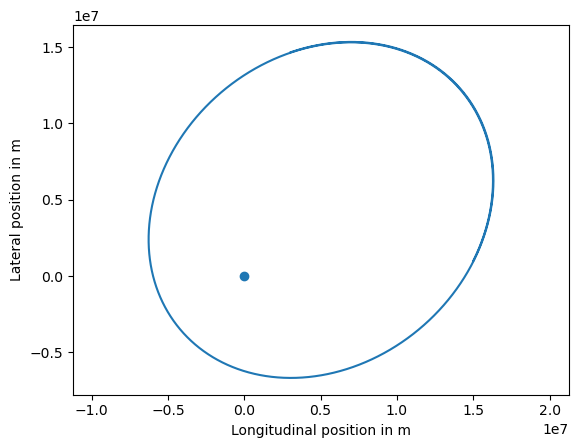

In [1]:
import numpy as np
import matplotlib.pyplot as plt

h = 0.1 # s
earth_mass = 5.97e24 # kg
gravitational_constant = 6.67e-11 # N m2 / kg2

def acceleration(spaceship_position):
    vector_to_earth = - spaceship_position # earth at origin
    return gravitational_constant * earth_mass / np.linalg.norm(vector_to_earth) ** 3 * vector_to_earth

def ship_trajectory():
    num_steps = 200000 # Feel free to experiment with a lower number of steps
    x = np.zeros([num_steps + 1, 2]) # m
    v = np.zeros([num_steps + 1, 2]) # m/s
    x[0, 0] = 15e6 # start values of spacecraft
    x[0, 1] = 1e6
    v[0, 0] = 2e3
    v[0, 1] = 4e3
    
    for step in range(0, num_steps):
        a = acceleration(x[step])
        x[step+1, 0] = x[step, 0] + h*(v[step, 0])
        x[step+1, 1] = x[step, 1] + h*(v[step, 1])
        v[step+1, 0] = v[step,0] + h * a[0]
        v[step+1, 1] = v[step,1] + h * a[1]
        
    return x, v

x, v = ship_trajectory()

def plot_me():
    plt.plot(x[:, 0], x[:, 1])
    plt.scatter(0, 0)
    plt.axis('equal')
    axes = plt.gca()
    axes.set_xlabel('Longitudinal position in m')
    axes.set_ylabel('Lateral position in m')
    plt.show()

plot_me()


Alternatief: Je kunt ook beide coordinaten in 1 keer updaten.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

h = 0.1 # s
earth_mass = 5.97e24 # kg
gravitational_constant = 6.67e-11 # N m2 / kg2

def acceleration(spaceship_position):
    vector_to_earth = - spaceship_position # earth at origin
    return gravitational_constant * earth_mass / np.linalg.norm(vector_to_earth) ** 3 * vector_to_earth

def ship_trajectory():
    num_steps = 200000 # Feel free to experiment with a lower number of steps
    x = np.zeros([num_steps + 1, 2]) # m
    v = np.zeros([num_steps + 1, 2]) # m/s
    x[0, 0] = 15e6 # start values of spacecraft
    x[0, 1] = 1e6
    v[0, 0] = 2e3
    v[0, 1] = 4e3
    
    for i in range(0, num_steps):
        a = acceleration(x[i])
        x[i + 1] = x[i] + h * v[i]
        v[i + 1] = v[i] + h * a
    return x, v

x, v = ship_trajectory()

def plot_me():
    plt.plot(x[:, 0], x[:, 1])
    plt.scatter(0, 0)
    plt.axis('equal')
    axes = plt.gca()
    axes.set_xlabel('Longitudinal position in m')
    axes.set_ylabel('Lateral position in m')
    plt.show()

plot_me()


## Volgende les:

Heun's method: een nauwkeurigere methode dan Forward Euler.